<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

Project Submitted by: Abhinav Nimje <br>
Email ID: abhinavnimje@gmail.com <br>
Cohort: July 2020 <br>
Term: Term 3 - Machine Learning Foundation<br>
Domain: Stock Market Price Data <br>
Source: Quandl

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Machine Learning Algoritms and Execution**](#Section9)<br>
10. [**Final Evaluation**](#Section10) <br>
11. [**Conclusion**](#Section11) <br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

- This Study is to perform Machine Learning Algorithms on Stock Price Data for Jindal Stainless (Hisar) Ltd.

- This dataset contains End of Day prices for stock for last 5 years.

- Based on Open, High, Low and Close pries, both linear and classification Algorithms will be used.

- Classification Algorithm will be used to find out Trend and Regression will be used to find out future price prediction.

<p align="center"><img src="https://images.moneycontrol.com/static-mcnews/2020/01/Sensex_BSE_NSE_Stock-market_bull_bear_Gold-5-770x433.png"></p>

---
<a name = Section2></a>
# **2. Problem Statement**
---

- Here we are going to analyze and conclude few observations for following Problem Statement.
- **Problem Statement:**

  - With data provided for Open High Low Close (OHLC), we need to find out trend and Future closing price.

  - There will be 2 types Algorithms used to achived mentioned probelm statement.

  - Regression to calculate Future Stock Price.

  - And Classification to find out Trend of Stock.

  - Few more fields needs to be added to the dataset to make study more powerful.
  
<p align="center"><img src="https://images.moneycontrol.com/static-mcnews/2020/01/Sensex_BSE_NSE_Stock-market_bull_bear_Gold-4-770x433.png"></p>

- Following points are in scope of this study.

- **Scope of Study:**
  - Study is carried out for Jindal Stainless (HISAR) Ltd..

  - Data considered for the study is from last 5 years to till date.

  - For the sake of simplicity, Volume and Volume in delivery is not considered.

  - Few Moving averages are included to make study powerful.


---
<a id = Section3></a>
# **3. Importing Libraries**
---

- Importing all necessary libraries which are needed for Exploratory Data Analysis on this Retail Sales Data .

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [66]:
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
%matplotlib inline
import seaborn as sns                                               # Importing seaborn library for interactive visualization
#----------------------------------------------------------------------------------------------------------------------
import warnings                                                     # To get rid of all warnings
warnings.filterwarnings('ignore')
#----------------------------------------------------------------------------------------------------------------------
import math                                                         # Importing math for calculations
#----------------------------------------------------------------------------------------------------------------------
import quandl                                                       # Import Quandl to get EOD data for Stocks
#----------------------------------------------------------------------------------------------------------------------

#----------------------------------------------------------------------------------------------------------------------
#-------------- Importing Machine Learning, Normalization and Standardization Libraries -------------------------------
#----------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Import Standard Scaler for value conversion
#----------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split training and testing data
#----------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LinearRegression                   # Regression Algorithm
from sklearn.linear_model import LogisticRegression                 # Classification Algorithm
from sklearn.ensemble import RandomForestClassifier                 # Classification Algorithm
from sklearn.ensemble import RandomForestRegressor                  # Regressor Algorithm
from sklearn import tree                                            # Decision Tree Algorithm
#----------------------------------------------------------------------------------------------------------------------
from sklearn import metrics                                         # Calculate MAE and RMSE
from sklearn.metrics import accuracy_score                          # Accuracy Score
from sklearn.metrics import confusion_matrix                        # Confusion Matrix
from sklearn.metrics import classification_report                   # Precicision, Recall, F1 Score
from sklearn.metrics import r2_score                                # R2 for regression problem
from sklearn.metrics import precision_score                         # precision for Classification problem
from sklearn.metrics import recall_score                            # recall for Classification problem
from sklearn.metrics import f1_score                                # F1 for Classification problem
#----------------------------------------------------------------------------------------------------------------------



---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.


### **Importing API Key to fetch data from Quandl**

In [2]:
quandl.ApiConfig.api_key = 'hwyxqiCEAFxxyzbgXLU5'                   # Import APIKEY to get access to QUANDL data

### **Data Acquisition**

### **Fetch data from Quandl for Jindal Stainless (Hisar) Ltd EOD Prices**

In [3]:
# This is to get priced for Jindal Stainless (Hisar) Ltd EOD Prices
df = quandl.get('BSE/BOM539597')
df.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2017-02-21,105.25,108.9,105.20,105.75,106.33,68764.0,753.0,7311931.0,26460.0,38.48,3.70,0.50
2017-02-22,106.00,111.0,105.80,107.15,108.48,94920.0,1182.0,10296999.0,52781.0,55.61,5.20,1.15
2017-02-23,106.95,111.0,106.95,109.60,109.40,149331.0,1404.0,16336241.0,82039.0,54.94,4.05,2.65
2017-02-27,110.00,114.4,109.10,111.90,112.00,185009.0,1914.0,20720743.0,42478.0,22.96,5.30,1.90
2017-02-28,113.00,115.7,113.00,114.60,114.80,63833.0,563.0,7327924.0,24198.0,37.91,2.70,1.60


In [4]:
df.shape

(969, 12)

### **Data Description**

---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:

|Id|Feature|Description|
|:--|:--|:--|
|01| Date                   | Date of Trading|
|02| Open                   | Open price of the day|
|03| High                   | High price of the day|
|04| Low                    | Low price of the day| 
|05| Close                  | Close price of the day|
|06| WAP                    | Weighted Average Price of the day| 
|07| No. of Shares          | Number of Shares traded for the day|
|08| No. of Trades          | Number of transactions executed for the day|
|09| Total Turnover         | Total turnover for the day| 
|10| Deliverable Quantity   | Total Quantities carried overnight| 
|11| % Deli. Qty to Traded Qty | % Delivery of shares carried | 
|12| Spread H-L             | Difference between High and Low|
|13| Spread C-O             | Difference between Close and Open|

### **Data Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 969 entries, 2017-02-21 to 2021-01-19
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       969 non-null    float64
 1   High                       969 non-null    float64
 2   Low                        969 non-null    float64
 3   Close                      969 non-null    float64
 4   WAP                        969 non-null    float64
 5   No. of Shares              969 non-null    float64
 6   No. of Trades              969 non-null    float64
 7   Total Turnover             969 non-null    float64
 8   Deliverable Quantity       969 non-null    float64
 9   % Deli. Qty to Traded Qty  969 non-null    float64
 10  Spread H-L                 969 non-null    float64
 11  Spread C-O                 969 non-null    float64
dtypes: float64(12)
memory usage: 98.4 KB


There are total 967 rows and 12 columns. None of the column contains null values. 

In [6]:
df.describe().round(2)

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,969.00,969.00,969.00,969.00,969.00,969.00,969.00,9.690000e+02,969.00,969.00,969.00,969.00
mean,116.10,119.06,113.36,115.79,116.40,112007.89,1075.37,1.505910e+07,42672.27,39.39,5.69,-0.31
std,50.34,51.55,49.31,50.09,50.50,183534.21,1162.25,2.777618e+07,118523.82,19.86,3.67,3.76
min,32.00,34.60,30.40,31.75,32.47,685.00,16.00,2.963500e+04,365.00,3.29,0.45,-16.10
25%,76.85,78.35,74.80,76.40,77.10,18658.00,311.00,1.639905e+06,6776.00,25.46,2.90,-1.95
50%,98.55,101.00,95.55,98.25,98.55,49273.00,678.00,5.394107e+06,15515.00,37.93,4.75,-0.50
75%,147.90,152.00,145.05,147.55,148.64,114545.00,1481.00,1.564733e+07,38521.00,50.80,7.50,1.30
max,243.60,252.00,235.70,241.65,243.01,1650731.00,10534.00,3.221218e+08,1237197.00,99.89,25.00,16.60


---
<a name = Section5></a>
# **5. Data Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [7]:
profile = ProfileReport(df)
profile.to_file("Profiling Output.html")

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos
  
  - Dropping and adding features

In [8]:
df.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2017-02-21,105.25,108.9,105.20,105.75,106.33,68764.0,753.0,7311931.0,26460.0,38.48,3.70,0.50
2017-02-22,106.00,111.0,105.80,107.15,108.48,94920.0,1182.0,10296999.0,52781.0,55.61,5.20,1.15
2017-02-23,106.95,111.0,106.95,109.60,109.40,149331.0,1404.0,16336241.0,82039.0,54.94,4.05,2.65
2017-02-27,110.00,114.4,109.10,111.90,112.00,185009.0,1914.0,20720743.0,42478.0,22.96,5.30,1.90
2017-02-28,113.00,115.7,113.00,114.60,114.80,63833.0,563.0,7327924.0,24198.0,37.91,2.70,1.60


#### Adding 20 days and 50 days moving average to the dataframe. ####

In [9]:
df['MA20'] = df.Close.rolling(window=20).mean()
df['MA50'] = df.Close.rolling(window=50).mean()

#### Making a copy of dataframe.

In [10]:
df_copy = pd.DataFrame(df) 
df_copy.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,MA20,MA50
Date,,,,,,,,,,,,,,
2017-02-21,105.25,108.9,105.20,105.75,106.33,68764.0,753.0,7311931.0,26460.0,38.48,3.70,0.50,NaN,NaN
2017-02-22,106.00,111.0,105.80,107.15,108.48,94920.0,1182.0,10296999.0,52781.0,55.61,5.20,1.15,NaN,NaN
2017-02-23,106.95,111.0,106.95,109.60,109.40,149331.0,1404.0,16336241.0,82039.0,54.94,4.05,2.65,NaN,NaN
2017-02-27,110.00,114.4,109.10,111.90,112.00,185009.0,1914.0,20720743.0,42478.0,22.96,5.30,1.90,NaN,NaN
2017-02-28,113.00,115.7,113.00,114.60,114.80,63833.0,563.0,7327924.0,24198.0,37.91,2.70,1.60,NaN,NaN


#### Add new feature "Trend" to find out daily up or downward movement for the stock

In [11]:
df['Trend'] = ""
for i in df.index:
    if df['Spread C-O'][i] >= 0:
        df['Trend'][i] = "Up"
    else:
        df['Trend'][i] = "Down"

In [12]:
df.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,MA20,MA50,Trend
Date,,,,,,,,,,,,,,,
2017-02-21,105.25,108.9,105.20,105.75,106.33,68764.0,753.0,7311931.0,26460.0,38.48,3.70,0.50,NaN,NaN,Up
2017-02-22,106.00,111.0,105.80,107.15,108.48,94920.0,1182.0,10296999.0,52781.0,55.61,5.20,1.15,NaN,NaN,Up
2017-02-23,106.95,111.0,106.95,109.60,109.40,149331.0,1404.0,16336241.0,82039.0,54.94,4.05,2.65,NaN,NaN,Up
2017-02-27,110.00,114.4,109.10,111.90,112.00,185009.0,1914.0,20720743.0,42478.0,22.96,5.30,1.90,NaN,NaN,Up
2017-02-28,113.00,115.7,113.00,114.60,114.80,63833.0,563.0,7327924.0,24198.0,37.91,2.70,1.60,NaN,NaN,Up


---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [13]:
df = df.dropna()
df.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,MA20,MA50,Trend
Date,,,,,,,,,,,,,,,
2017-05-08,124.10,127.5,120.75,125.50,124.46,38122.0,545.0,4744600.0,18212.0,47.77,6.75,1.40,137.7075,133.797,Up
2017-05-09,126.90,140.0,126.00,134.90,133.92,204606.0,2841.0,27401593.0,87059.0,42.55,14.00,8.00,137.1325,134.380,Up
2017-05-10,135.45,142.5,132.95,141.85,139.70,228259.0,2281.0,31888138.0,33854.0,14.83,9.55,6.40,136.9375,135.074,Up
2017-05-11,142.00,149.4,140.80,147.05,146.08,181242.0,1679.0,26476206.0,34139.0,18.84,8.60,5.05,136.9950,135.823,Up
2017-05-12,144.50,152.0,144.50,148.20,149.75,159142.0,1523.0,23830857.0,29723.0,18.68,7.50,3.70,137.1675,136.549,Up


---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

#### Reset the index

In [14]:
df = df.reset_index()

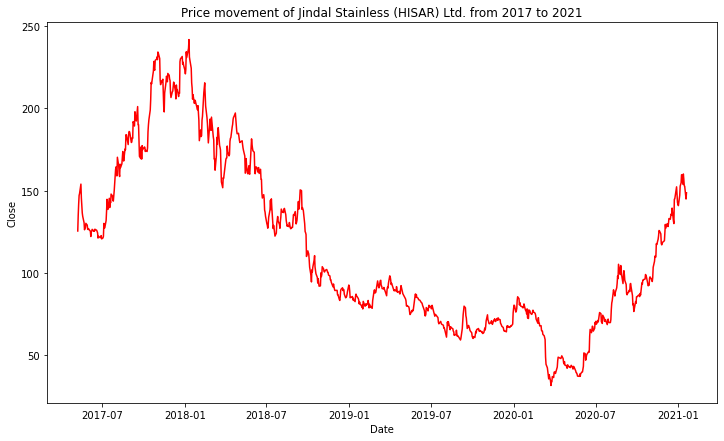

In [94]:
plt.figure(figsize=(12,7))
sns.lineplot(data=df, x='Date', y='Close', color='red')

plt.title('Price movement of Jindal Stainless (HISAR) Ltd. from 2017 to 2021')
plt.savefig('Price.png')

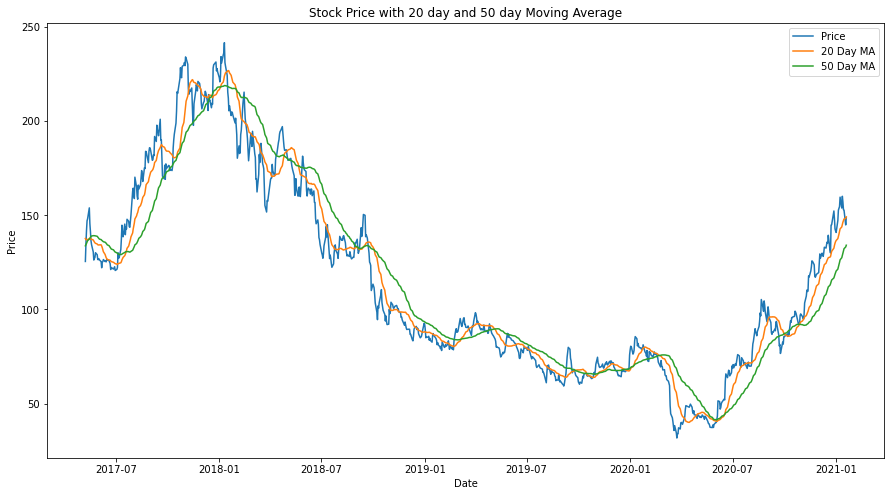

In [93]:
plt.figure(figsize=(15,8))
plt.plot(df.Date, df.Close, label = "Price")
plt.plot(df.Date, df.MA20, label = "20 Day MA")
plt.plot(df.Date, df.MA50, label = "50 Day MA")
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with 20 day and 50 day Moving Average')
plt.savefig('Prive vs MA.png')
plt.legend()
plt.show()

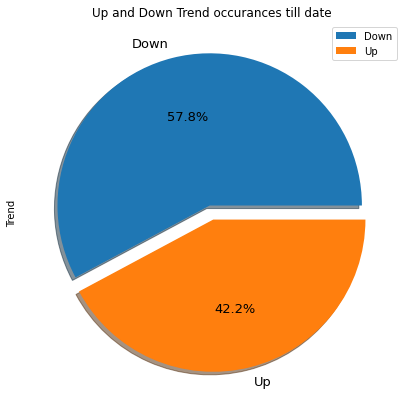

In [101]:
space= np.ones(2)/21
df['Trend'].value_counts().plot(kind='pie', figsize=(15,7), fontsize=13, explode=space,legend=True,autopct='%3.1f%%',shadow=True)
plt.ylabel('Trend')
plt.title('Up and Down Trend occurances till date')
plt.savefig('Pie.png')
plt.show()

This chart depicts that data is not imbalanced.

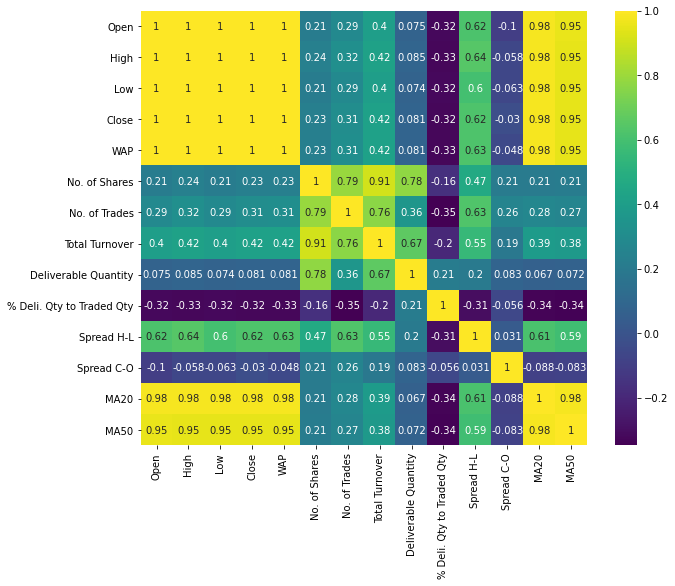

In [17]:
price_corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(price_corr, annot=True, cmap='viridis')
plt.savefig('HeatMap.png')
plt.show()

---
<a name = Section9></a>
# **9. Machine Learning Algorithms and Execution**
---

#### Separate X and y to apply machine learning Algorithms. <br>
##### Here both Regression and Classification are applied to the dataset. Classification to find out trend and Regression to predict Closing price of the stock. 

Create y for Regression Algorithms for Closing Price. 

In [18]:
y_Close = df['Close'] 
y_Close.head()

0    125.50
1    134.90
2    141.85
3    147.05
4    148.20
Name: Close, dtype: float64

Create y for Classification Algorithms for Trend of the Stock. 

In [19]:
y_Trend = df['Trend']
y_Trend.head()

0    Up
1    Up
2    Up
3    Up
4    Up
Name: Trend, dtype: object

Create X using dropping following features. <br>
Date, Close, Trend, Spread C-O, Total Turnover, Deliverable Quantity, % Deli. Qty to Traded Qty, Spread H-L, No. of Shares, No. of Trades

In [20]:
X = pd.DataFrame(df)
X.reset_index()
X = X.drop(['Date','Close','Trend','Spread C-O','Total Turnover','Deliverable Quantity','% Deli. Qty to Traded Qty','Spread H-L','No. of Shares','No. of Trades'], axis=1)
X.head()

,Open,High,Low,WAP,MA20,MA50
0,124.10,127.5,120.75,124.46,137.7075,133.797
1,126.90,140.0,126.00,133.92,137.1325,134.380
2,135.45,142.5,132.95,139.70,136.9375,135.074
3,142.00,149.4,140.80,146.08,136.9950,135.823
4,144.50,152.0,144.50,149.75,137.1675,136.549


Apply Standard Scaler to Encode features on input datasets

In [21]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,0.174388,0.178760,0.166240,0.175082,0.456574,0.383631
1,0.228878,0.416247,0.270569,0.358600,0.445190,0.395340
2,0.395267,0.463744,0.408681,0.470727,0.441329,0.409278
3,0.522735,0.594837,0.564677,0.594495,0.442467,0.424321
4,0.571387,0.644235,0.638204,0.665690,0.445883,0.438902


Split Training and Testing dataset. Based on following code, 80% of data will be used for training and 20% for testing.

#### Split the data for Regression Problem using y_Close

In [22]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_test, y_Close_train, y_Close_test=split(X,y_Close)

print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_Close_train.shape)

print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_Close_test.shape)

Train cases as below
X_train shape:  (736, 6)
y_train shape:  (736,)

Test cases as below
X_test shape:  (184, 6)
y_test shape:  (184,)


Creating list to log various scores for Algorithms

In [23]:
Regression_Score = []
Score_Heading = ['Algorithm','Mean Absolute Error','RMSE','R-Squared','Adjusted R-Squared']

In [74]:
Classification_Score = []
Accuracy_Heading = ['Algorithm','Accuracy','AUC']

# Regression Algorithms

## Linear Regression

In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_Close_train) 

LinearRegression()

In [25]:
y_Close_pred_lin = linreg.predict(X_test)

In [26]:
MAE_linear = metrics.mean_absolute_error(y_Close_test, y_Close_pred_lin)
print('MAE Linear: ', MAE_linear)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_Close_test, y_Close_pred_lin))
print('RMSE Linear: ', RMSE_linear)
r2_linear = r2_score(y_Close_test, y_Close_pred_lin)
print ("R2 Linear: ", r2_linear)
adjusted_r2_linear = 1 - (1-r2_linear)*(len(y_Close_test)-1)/(len(y_Close_test)-X_test.shape[1]-1)
print ("Adjusted R2 Linear: ", adjusted_r2_linear)

MAE Linear:  0.9058714653029464
RMSE Linear:  1.298603716874183
R2 Linear:  0.9993836263949747
Adjusted R2 Linear:  0.9993627323744654


In [27]:
Regression_Score.append(['Linear Regression', MAE_linear, RMSE_linear, r2_linear,adjusted_r2_linear])

## Decision Tree Regressor

In [28]:
model = tree.DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_Close_train)

DecisionTreeRegressor(random_state=0)

In [29]:
y_Close_pred_dec = model.predict(X_test)

In [30]:
MAE_dec = metrics.mean_absolute_error(y_Close_test, y_Close_pred_dec)
print('MAE Decision Tree: ', MAE_dec)
RMSE_dec =np.sqrt(metrics.mean_squared_error(y_Close_test, y_Close_pred_dec))
print('RMSE Decision Tree: ', RMSE_dec)
r2_dec = r2_score(y_Close_test, y_Close_pred_dec)
print('R2 Decision Tree: ', r2_dec)
adjusted_r2_dec = 1 - (1-r2_dec)*(len(y_Close_test)-1)/(len(y_Close_test)-X_test.shape[1]-1)
print('Adjusted R2 Decision Tree: ', adjusted_r2_dec)

MAE Decision Tree:  1.5247282608695643
RMSE Decision Tree:  2.1458725548687947
R2 Decision Tree:  0.9983169438695769
Adjusted R2 Decision Tree:  0.9982598911193931


In [31]:
Regression_Score.append(['Decision Tree Regressor', MAE_dec, RMSE_dec, r2_dec,adjusted_r2_dec])

## Random Forest Regressor

In [32]:
rfr = RandomForestRegressor()
model1 = rfr.fit(X_train, y_Close_train)

In [33]:
y_Close_pred_rfr = model1.predict(X_test)

In [34]:
MAE_rfr = metrics.mean_absolute_error(y_Close_test, y_Close_pred_rfr)
print('MAE Random Forest: ', MAE_rfr)
RMSE_rfr = np.sqrt(metrics.mean_squared_error(y_Close_test, y_Close_pred_rfr))
print('RMSE Random Forest: ', RMSE_rfr)
r2_rfr = r2_score(y_Close_test, y_Close_pred_rfr)
print('R2 Random Forest: ', r2_rfr)
adjusted_r2_rfr = 1 - (1-r2_rfr)*(len(y_Close_test)-1)/(len(y_Close_test)-X_test.shape[1]-1)
print('Adjusted R2 Random Forest: ', adjusted_r2_rfr)

MAE Random Forest:  1.1746222826086963
RMSE Random Forest:  1.6826742137178152
R2 Random Forest:  0.9989651180117246
Adjusted R2 Random Forest:  0.9989300372663593


In [35]:
Regression_Score.append(['Random Forest Regressor', MAE_rfr, RMSE_rfr, r2_rfr,adjusted_r2_rfr])

In [36]:
Final_Score = pd.DataFrame(data = Regression_Score, columns = Score_Heading)
Final_Score = Final_Score.set_index('Algorithm')
Final_Score

,Mean Absolute Error,RMSE,R-Squared,Adjusted R-Squared
Algorithm,,,,
Linear Regression,0.905871,1.298604,0.999384,0.999363
Decision Tree Regressor,1.524728,2.145873,0.998317,0.998260
Random Forest Regressor,1.174622,1.682674,0.998965,0.998930


Linear Regression is working very well for this problem. 

# Classification Algorithms

Split Training and Testing dataset. Based on following code, 80% of data will be used for training and 20% for testing

Split y_Trend for following Classification Problem

## Logistic Regression

In [37]:
X_train, X_test, y_Trend_train, y_Trend_test = split(X,y_Trend)

In [38]:
lr = LogisticRegression()
model_lr = lr.fit(X_train, y_Trend_train)
y_Trend_pred_lr = model_lr.predict(X_test)
logistic_score1 = accuracy_score(y_Trend_test,y_Trend_pred_lr)
logistic_score1

0.75

In [39]:
print(confusion_matrix(y_Trend_test,y_Trend_pred_lr))

[[107   2]
 [ 44  31]]


In [40]:
print(classification_report(y_Trend_test,y_Trend_pred_lr))

              precision    recall  f1-score   support

        Down       0.71      0.98      0.82       109
          Up       0.94      0.41      0.57        75

    accuracy                           0.75       184
   macro avg       0.82      0.70      0.70       184
weighted avg       0.80      0.75      0.72       184



Logistic Regression has accuracy of 75%

## Decision Tree Classifier

In [41]:
decision_model = tree.DecisionTreeClassifier(random_state = 0)
decision_model.fit(X_train, y_Trend_train)
y_Trend_pred_dt = decision_model.predict(X_test)
decision_score = accuracy_score(y_Trend_test,y_Trend_pred_dt)
decision_score

0.657608695652174

In [42]:
print(confusion_matrix(y_Trend_test,y_Trend_pred_dt))

[[74 35]
 [28 47]]


In [43]:
print(classification_report(y_Trend_test,y_Trend_pred_dt))

              precision    recall  f1-score   support

        Down       0.73      0.68      0.70       109
          Up       0.57      0.63      0.60        75

    accuracy                           0.66       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.66      0.66      0.66       184



Decision Tree has accuracy of 65%

## Random Forest Classifier

In [44]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_Trend_train)

In [45]:
y_Trend_pred_rfc = rfc_model.predict(X_test)
rfc_score = accuracy_score(y_Trend_test,y_Trend_pred_rfc)
rfc_score

0.6793478260869565

In [46]:
print(confusion_matrix(y_Trend_test,y_Trend_pred_rfc))

[[84 25]
 [34 41]]


In [47]:
print(classification_report(y_Trend_test,y_Trend_pred_dt))

              precision    recall  f1-score   support

        Down       0.73      0.68      0.70       109
          Up       0.57      0.63      0.60        75

    accuracy                           0.66       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.66      0.66      0.66       184



Random Forest Classifier has accuracy of 68%

### Checking Value of ccp_alphas to avoid Overfitting and Underfitting

In [48]:
path = decision_model.cost_complexity_pruning_path(X_train, y_Trend_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.0011646 , 0.0011646 , 0.00117754, 0.00118886,
       0.00118886, 0.00120773, 0.00122283, 0.00126165, 0.00126499,
       0.00126812, 0.00126812, 0.00128719, 0.00129962, 0.00131017,
       0.0013587 , 0.00144928, 0.001508  , 0.00150966, 0.00158103,
       0.00161031, 0.00174689, 0.00181159, 0.00181159, 0.00181159,
       0.00181159, 0.00181159, 0.00193353, 0.00195812, 0.00207039,
       0.00213509, 0.00217391, 0.00217391, 0.00226126, 0.00226449,
       0.00227699, 0.00231693, 0.00232919, 0.00233669, 0.0023913 ,
       0.00241546, 0.00241546, 0.00249094, 0.00253623, 0.00258799,
       0.00267843, 0.00272952, 0.00282032, 0.00316745, 0.00323634,
       0.00331025, 0.00351339, 0.00351448, 0.00353043, 0.00354646,
       0.00356658, 0.00357113, 0.00364569, 0.00412704, 0.0045055 ,
       0.00468611, 0.00517598, 0.00540294, 0.00556653, 0.00632069,
       0.00794686])

In [49]:
clfs = []
for ccp_alpha in ccp_alphas:
    model_ccp = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model_ccp.fit(X_train, y_Trend_train)
    clfs.append(model)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))



Number of nodes in the last tree is: 1423 with ccp_alpha: 0.007946862515158665


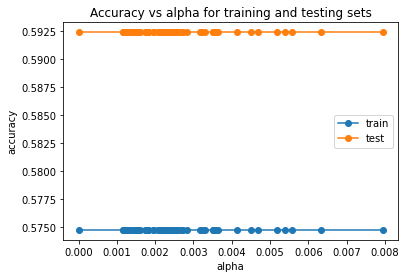

In [50]:
train_scores = [model_ccp.score(X_train, y_Trend_train) for model in clfs]
test_scores = [model_ccp.score(X_test, y_Trend_test) for model in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

ccp_alphas will not be useful for hyperparameter tuning

### Applying GridSearchCV to Decision Tree to check if Accuracy is improved with the help of hyperparameter tuning.

In [51]:
from sklearn.model_selection import GridSearchCV
decision_tree_classifier = tree.DecisionTreeClassifier(random_state = 0)
tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_Trend_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}],
             refit='AUC')

In [52]:
y_pred_gridcv = grid_search.predict(X_test)

In [53]:
print('Accuracy after GridSearchCV: ', accuracy_score(y_Trend_test,y_pred_gridcv))

Accuracy after GridSearchCV:  0.6358695652173914


#### Accuracy of Decision Tree Classifier is not improved.

In [54]:
print(confusion_matrix(y_Trend_test,y_pred_gridcv))

[[77 32]
 [35 40]]


In [55]:
print(classification_report(y_Trend_test,y_pred_gridcv))

              precision    recall  f1-score   support

        Down       0.69      0.71      0.70       109
          Up       0.56      0.53      0.54        75

    accuracy                           0.64       184
   macro avg       0.62      0.62      0.62       184
weighted avg       0.63      0.64      0.63       184



### Plotting ROC/AUC to check efficient model. 

#### Apply One Hot Encoding

In [56]:
y_scaler =  pd.get_dummies(y_Trend_test, drop_first = True)

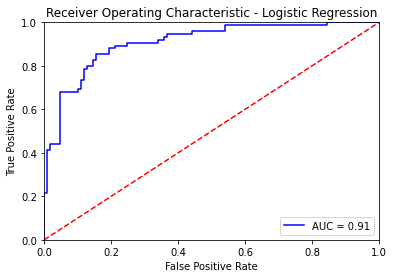

In [95]:
probs = model_lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_scaler, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC Logistic.png')
plt.show()


In [76]:
Classification_Score.append(['Logistic Regression', logistic_score1, roc_auc])

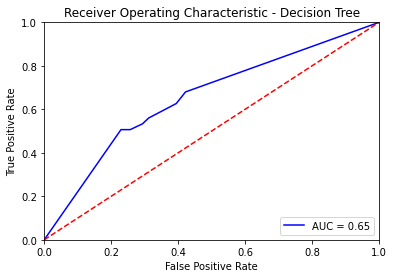

In [96]:
probs = grid_search.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_scaler, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC Decision Tree.png')
plt.show()

In [78]:
Classification_Score.append(['Decision Tree Classifier', decision_score, roc_auc])

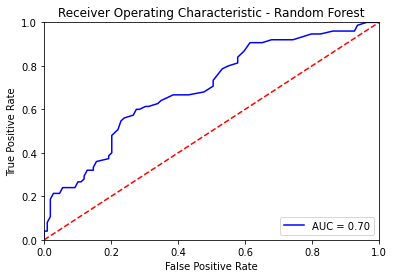

In [97]:
probs = rfc_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_scaler, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC Random Forest.png')
plt.show()

In [80]:
Classification_Score.append(['Random Forest Classifier', rfc_score, roc_auc])

In [81]:
Final_Accuracy = pd.DataFrame(data = Classification_Score, columns = Accuracy_Heading)
Final_Accuracy = Final_Accuracy.set_index('Algorithm')
Final_Accuracy

,Accuracy,AUC
Algorithm,,
Logistic Regression,0.750000,0.907768
Decision Tree Classifier,0.657609,0.653639
Random Forest Classifier,0.679348,0.697798


### Logistic Regression is providing better value of Area Under the Curve (AUC) = 0.91

---
<a name = Section10></a>
# **10. Final Evaluation**
---

#### Regression Evaluation

In [60]:
Final_Score

,Mean Absolute Error,RMSE,R-Squared,Adjusted R-Squared
Algorithm,,,,
Linear Regression,0.905871,1.298604,0.999384,0.999363
Decision Tree Regressor,1.524728,2.145873,0.998317,0.998260
Random Forest Regressor,1.174622,1.682674,0.998965,0.998930


In [89]:
y_Close_train_pred = linreg.predict(X)

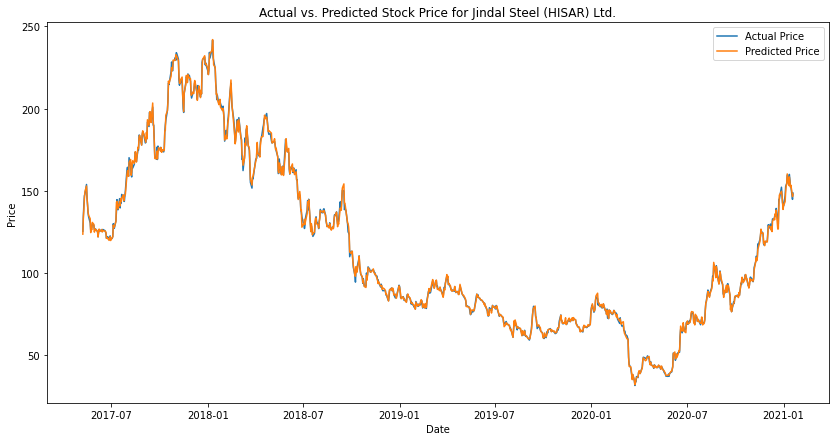

In [102]:
plt.figure(figsize=(14,7))
plt.plot(df.Date, df.Close, label = "Actual Price")
plt.plot(df.Date, y_Close_train_pred, label = "Predicted Price")
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Price for Jindal Steel (HISAR) Ltd.')
plt.legend()
plt.savefig('Actual vs Predicted.png')
plt.show()

#### Classification Evaluation

In [82]:
Final_Accuracy

,Accuracy,AUC
Algorithm,,
Logistic Regression,0.750000,0.907768
Decision Tree Classifier,0.657609,0.653639
Random Forest Classifier,0.679348,0.697798


---
<a name = Section11></a>
# **11. Conclusion**
---

#### Linear Regression (Regression problem) and Logistic Regression (Classification problem) are working better in this study.